In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
plt.style.use('ggplot')
plt.style.use('seaborn')
import numpy as np 
from datetime import datetime
from isoweek import Week
import seaborn as sns

In [3]:
#df = pd.read_csv('Summery.csv')
df2 = pd.read_csv('new_summery.csv')

In [183]:
df2.head()

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery per week,Dropsize,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,61fbcd832cea787beffc31c8,SHASHEMNE - HAWASSA - NEGELE,SEFERESELAM - YERGALEM,wendimamachoch stockist,16,2650,5,21,16,1.000000,165.625000,NaN,NaN,NaN,NaN,NaN
1,623588d82cea787bef0153a6,ADAMA -ZEWAY-CHERO,ZEWAY - MEKI - BUTAGIRA,Shimekit sttockist,1,112,11,21,10,0.100000,112.000000,NaN,NaN,NaN,NaN,NaN
2,6159f38bbab1dd88bd6a348d,NORTH - CENTRAL ADDIS,WELOSEFER - OLOMPIA,German Restaurant &bar,6,560,1,21,20,0.300000,93.333333,NaN,NaN,NaN,NaN,NaN
3,625cf6592cea787bef04db59,HOSSANA - SODO - JINKA,SODO - AREKA - SHONE,semegn stock,2,170,18,21,3,0.666667,85.000000,NaN,NaN,NaN,NaN,NaN
4,61b20923554c5775fdf44788,SOUTH ADDIS,JEMO - HANAMARIAM,Sefi stockist,13,993,1,21,20,0.650000,76.384615,NaN,NaN,NaN,NaN,NaN


In [131]:
df2['Outlet ID'].value_counts()

61fbcd832cea787beffc31c8    1
6159f38bbab1dd88bd6a33e6    1
61fae39138e0d13307752ac5    1
6159f38bbab1dd88bd6a370c    1
6215c9fb2cea787beffe78b6    1
                           ..
6159f38bbab1dd88bd6a3b24    1
6159f38bbab1dd88bd6a44a9    1
6159f38bbab1dd88bd6a2769    1
6159f38bbab1dd88bd6a460c    1
6159f38bbab1dd88bd6a3f79    1
Name: Outlet ID, Length: 8064, dtype: int64

In [132]:
df2.shape

(8064, 16)

In [27]:
df2.rename(columns = {'Delievery per week':'Delievery_per_week'}, inplace = True)

In [133]:
#df['First purchase week'] = np.random.randint(0,19, size=len(df))

In [113]:
df['Delievery per week'] = df['Number of weeks b/n purchase and analysis data'] / df['Total_delivery']

In [136]:
df2['Outlet ID'].value_counts()

61fbcd832cea787beffc31c8    1
6159f38bbab1dd88bd6a33e6    1
61fae39138e0d13307752ac5    1
6159f38bbab1dd88bd6a370c    1
6215c9fb2cea787beffe78b6    1
                           ..
6159f38bbab1dd88bd6a3b24    1
6159f38bbab1dd88bd6a44a9    1
6159f38bbab1dd88bd6a2769    1
6159f38bbab1dd88bd6a460c    1
6159f38bbab1dd88bd6a3f79    1
Name: Outlet ID, Length: 8064, dtype: int64

In [115]:
df['Dropsize'] = df['Quantity_sold'] / df['Total_delivery']

df= df.fillna(0)
df.head()

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery per week,Dropsize
0,6159f38bbab1dd88bd6a26b9,EAST ADDIS,CMC - GORO,Adane Resraurant,4.0,6.0,2.0,20.0,18.0,4.500000,1.500000
1,6159f38bbab1dd88bd6a26ba,ADAMA -ZEWAY-CHERO,ADAMA - WENJI,Cheru Medhanialem Butchery,49.0,162.0,1.0,20.0,19.0,0.387755,3.306122
2,6159f38bbab1dd88bd6a26bd,SOUTH ADDIS,MASELETEGNA - AKAKI- TULU DIMTU,Rame Royal Grocery,4.0,4.0,8.0,20.0,12.0,3.000000,1.000000
3,6159f38bbab1dd88bd6a26be,ADAMA -ZEWAY-CHERO,DUKEM - DEBREZEIT,Shenen Bin Garden,18.0,25.0,2.0,20.0,18.0,1.000000,1.388889
4,6159f38bbab1dd88bd6a26bf,WEST ADDIS,TOREHAYLOCH - WELETE,Sodo Menech Bar,5.0,6.0,2.0,20.0,18.0,3.600000,1.200000


In [116]:
df.shape

(416827, 11)

In [96]:
clustr_1 =clustr_1.to_csv('clustr_1.csv',index=False)

In [137]:
clustr_1 = df2[(df2['Dropsize'] <= 18) & (df2['Delievery per week'] > 3) & (df2['Delievery per week'] < 4)]
clustr_1.head(100)

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery per week,Dropsize,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
138,626669622cea787bef05b15a,SHASHEMNE - HAWASSA - NEGELE,DILLA - BULE HORA,meresa hotel,14,229,17,21,4,3.500000,16.357143,NaN,NaN,NaN,NaN,NaN
237,625947062cea787bef04a463,HOSSANA - SODO - JINKA,AREBAMINCH - GIDOLE,lemlem hotel,14,189,17,21,4,3.500000,13.500000,NaN,NaN,NaN,NaN,NaN
517,6159f38bbab1dd88bd6a3a2b,ADAMA -ZEWAY-CHERO,ADAMA - WENJI,Lion Adama 2 Lounge,77,768,1,21,20,3.850000,9.974026,NaN,NaN,NaN,NaN,NaN
1691,61d2d7582cea787beff97d4d,SHASHEMNE - HAWASSA - NEGELE,PIASSA - MENEHARIYA,terara,70,369,2,21,19,3.684211,5.271429,NaN,NaN,NaN,NaN,NaN
1709,61d2bfa52cea787beff97287,SHASHEMNE - HAWASSA - NEGELE,PIASSA - MENEHARIYA,walia corner,60,314,4,21,17,3.529412,5.233333,NaN,NaN,NaN,NaN,NaN
1775,61d2b0cb2cea787beff96dcb,SHASHEMNE - HAWASSA - NEGELE,PIASSA - MENEHARIYA,golet,61,307,4,21,17,3.588235,5.032787,NaN,NaN,NaN,NaN,NaN
2978,6159f38bbab1dd88bd6a290c,ADAMA -ZEWAY-CHERO,ADAMA - WENJI,Alem Stock L,73,273,1,21,20,3.650000,3.739726,NaN,NaN,NaN,NaN,NaN
3176,61d2c2582cea787beff973bf,SHASHEMNE - HAWASSA - NEGELE,PIASSA - MENEHARIYA,classic,64,224,4,21,17,3.764706,3.500000,NaN,NaN,NaN,NaN,NaN
3318,6159f38bbab1dd88bd6a472d,NORTH - CENTRAL ADDIS,URAEL - MEGENAGNA,Vintage Bar And Resturant,66,225,1,21,20,3.300000,3.409091,NaN,NaN,NaN,NaN,NaN
4851,61f78bdf2cea787beffbbab0,SHASHEMNE - HAWASSA - NEGELE,PIASSA - MENEHARIYA,tropical,62,150,5,21,16,3.875000,2.419355,NaN,NaN,NaN,NaN,NaN


In [112]:
clustr_1_p = clustr_5.pivot_table(
        values='Outlet', 
        index=['Territory'],
        #columns=['Item name'], 
        aggfunc='count', 
        margins=True,
        margins_name='Total'
    )

#Quantity = Quantity.fillna(0)

clustr_1_p

NameError: name 'clustr_5' is not defined

In [138]:
clustr_1['Outlet ID'].value_counts()

626669622cea787bef05b15a    1
625947062cea787bef04a463    1
6159f38bbab1dd88bd6a3a2b    1
61d2d7582cea787beff97d4d    1
61d2bfa52cea787beff97287    1
61d2b0cb2cea787beff96dcb    1
6159f38bbab1dd88bd6a290c    1
61d2c2582cea787beff973bf    1
6159f38bbab1dd88bd6a472d    1
61f78bdf2cea787beffbbab0    1
61d2c4bc2cea787beff97520    1
Name: Outlet ID, dtype: int64

In [139]:
clustr_1.shape

(11, 16)

In [140]:
clustr_2 =clustr_2.to_csv('clustr_2.csv',index=False)

In [141]:
clustr_2 = df2[(df2['Dropsize'] > 6)  & (df2['Delievery per week'] >= 1) & (df2['Delievery per week'] < 3)]
clustr_2

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery per week,Dropsize,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,61fbcd832cea787beffc31c8,SHASHEMNE - HAWASSA - NEGELE,SEFERESELAM - YERGALEM,wendimamachoch stockist,16,2650,5,21,16,1.000000,165.625000,NaN,NaN,NaN,NaN,NaN
6,626645362cea787bef05a9f2,SHASHEMNE - HAWASSA - NEGELE,SEFERESELAM - YERGALEM,frew stockist,4,285,17,21,4,1.000000,71.250000,NaN,NaN,NaN,NaN,NaN
7,6159f38bbab1dd88bd6a4469,NORTH - CENTRAL ADDIS,URAEL - MEGENAGNA,Tamarat Zemaryam Makefafeya,24,1443,1,21,20,1.200000,60.125000,NaN,NaN,NaN,NaN,NaN
9,61f60dd02cea787beffbabd5,SHASHEMNE - HAWASSA - NEGELE,PIASSA - MENEHARIYA,niga distributer,38,2185,4,21,17,2.235294,57.500000,NaN,NaN,NaN,NaN,NaN
10,61f793b62cea787beffbbb76,SHASHEMNE - HAWASSA - NEGELE,SEFERESELAM - YERGALEM,minte stockist,23,1287,5,21,16,1.437500,55.956522,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,6159f38bbab1dd88bd6a4ab4,WEST ADDIS,MEXICO - SARBET - GERMAN,Zhemar Hotel,24,146,2,21,19,1.263158,6.083333,NaN,NaN,NaN,NaN,NaN
1314,6159f38bbab1dd88bd6a3c54,WEST ADDIS,PIASSA - WENGET,Mena Hotel,13,79,12,21,9,1.444444,6.076923,NaN,NaN,NaN,NaN,NaN
1318,61efb7582cea787beffb2c88,SHASHEMNE - HAWASSA - NEGELE,SEFERESELAM - YERGALEM,lideta,20,121,4,21,17,1.176471,6.050000,NaN,NaN,NaN,NaN,NaN
1319,6159f38bbab1dd88bd6a3e0c,ADAMA -ZEWAY-CHERO,ADAMA - MODJO,Mesale B&R,20,121,1,21,20,1.000000,6.050000,NaN,NaN,NaN,NaN,NaN


In [142]:
clustr_2['Outlet ID'].value_counts()

61fbcd832cea787beffc31c8    1
6215f8ec2cea787beffe80a0    1
6210da852cea787beffe1b31    1
61716a55839d2374ec2743f6    1
6159f38bbab1dd88bd6a3a39    1
                           ..
6159f38bbab1dd88bd6a2d54    1
6267a5832cea787bef05d004    1
624c21cf2cea787bef035286    1
61ee7c372cea787beffb1a32    1
6159f38bbab1dd88bd6a46fb    1
Name: Outlet ID, Length: 453, dtype: int64

In [143]:
clustr_2.shape

(453, 16)

In [71]:
clustr_3 =clustr_3.to_csv('clustr_3.csv',index=False)

In [144]:
clustr_3 = df2[(df2['Dropsize'] > 15) & (df2['Dropsize'] < 60) & (df2['Delievery per week'] < 1)]
clustr_3

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery per week,Dropsize,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
8,6159f38bbab1dd88bd6a2a87,ADAMA -ZEWAY-CHERO,ADAMA - MODJO,Ashenafi Stockiest,13,762,2,21,19,0.684211,58.615385,NaN,NaN,NaN,NaN,NaN
11,6159f38bbab1dd88bd6a329e,NORTH - CENTRAL ADDIS,MEGENAGNA - KEBENA - KASANCHIS,Fendisha Masinko,1,55,16,21,5,0.200000,55.000000,NaN,NaN,NaN,NaN,NaN
13,6159f38bbab1dd88bd6a3c69,NORTH - CENTRAL ADDIS,WELOSEFER - OLOMPIA,Menge Grocery,16,828,1,21,20,0.800000,51.750000,NaN,NaN,NaN,NaN,NaN
14,6159f38bbab1dd88bd6a319f,WEST ADDIS,PIASSA - WENGET,Ermiyas Makefafeya,15,751,1,21,20,0.750000,50.066667,NaN,NaN,NaN,NaN,NaN
15,627e25c52cea787bef0837a1,DEREDAWA - JIGJIGA,DEREDAWA 1,Hedase hotel,1,50,19,21,2,0.500000,50.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,61e279d62cea787beffa8315,SHASHEMNE - HAWASSA - NEGELE,SEFERESELAM - YERGALEM,enjohe,15,230,4,21,17,0.882353,15.333333,NaN,NaN,NaN,NaN,NaN
181,6159f38bbab1dd88bd6a2f5b,SOUTH ADDIS,JEMO - HANAMARIAM,Dave Lounge,6,92,1,21,20,0.300000,15.333333,NaN,NaN,NaN,NaN,NaN
182,6159f38bbab1dd88bd6a337b,NORTH - CENTRAL ADDIS,LEGEHAR - ENTOTO,Fkru Makefafeya,3,46,2,21,19,0.157895,15.333333,NaN,NaN,NaN,NaN,NaN
184,6159f38bbab1dd88bd6a38a5,EAST ADDIS,MEGENAGNA - JAKROS - GERJI,Kertina Bar And Restaurant,19,290,1,21,20,0.950000,15.263158,NaN,NaN,NaN,NaN,NaN


In [145]:
clustr_3['Outlet ID'].value_counts()

6159f38bbab1dd88bd6a2a87    1
618a30ee9ed4c17508ec01bc    1
6159f38bbab1dd88bd6a2a9d    1
6274e6aa2cea787bef074bbb    1
6159f38bbab1dd88bd6a2c27    1
                           ..
6159f38bbab1dd88bd6a3068    1
61f248802cea787beffb5864    1
627fbd172cea787bef08698f    1
6159f38bbab1dd88bd6a451e    1
6159f38bbab1dd88bd6a3e6d    1
Name: Outlet ID, Length: 109, dtype: int64

In [146]:
clustr_3.shape

(109, 16)

In [147]:
clustr_4 = df2[(df2['Dropsize'] > 3) & (df2['Dropsize'] < 15) & (df2['Delievery per week'] > 0.5) & (df2['Delievery per week'] < 2)]
clustr_4

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery per week,Dropsize,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
195,6159f38bbab1dd88bd6a39f5,WEST ADDIS,MEXICO - SARBET - GERMAN,Lemlem Makefafeya,11,163,4,21,17,0.647059,14.818182,NaN,NaN,NaN,NaN,NaN
196,6159f38bbab1dd88bd6a3c85,WEST ADDIS,TOREHAYLOCH - ASKO,Mera'ab Hotel,14,205,1,21,20,0.700000,14.642857,NaN,NaN,NaN,NaN,NaN
197,624bd78e2cea787bef0343e3,SHASHEMNE - HAWASSA - NEGELE,DILLA - BULE HORA,birhan hotel,5,73,17,21,4,1.250000,14.600000,NaN,NaN,NaN,NaN,NaN
198,6159f38bbab1dd88bd6a28d7,SOUTH ADDIS,MASELETEGNA - AKAKI- TULU DIMTU,Aklile Ye Metete Makefafeya,28,408,1,21,20,1.400000,14.571429,NaN,NaN,NaN,NaN,NaN
201,626917e92cea787bef05ff17,SHASHEMNE - HAWASSA - NEGELE,DILLA - BULE HORA,yoya siga bet,2,29,19,21,2,1.000000,14.500000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,6159f38bbab1dd88bd6a3624,NORTH - CENTRAL ADDIS,LEGEHAR - ENTOTO,Harege,22,67,1,21,20,1.100000,3.045455,NaN,NaN,NaN,NaN,NaN
3700,6159f38bbab1dd88bd6a454d,SOUTH ADDIS,MASELETEGNA - AKAKI- TULU DIMTU,Friends grocery,23,70,2,21,19,1.210526,3.043478,NaN,NaN,NaN,NaN,NaN
3701,6159f38bbab1dd88bd6a272d,EAST ADDIS,MEGENAGNA - JAKROS - GERJI,Abay Grocery,26,79,1,21,20,1.300000,3.038462,NaN,NaN,NaN,NaN,NaN
3702,61d3e9d82cea787beff98ff6,SHASHEMNE - HAWASSA - NEGELE,SHASHEMENE - ARSI NEGELE,Dagim,31,94,4,21,17,1.823529,3.032258,NaN,NaN,NaN,NaN,NaN


In [72]:
clustr_4 =clustr_4.to_csv('clustr_4.csv',index=False)

In [148]:
clustr_4['Outlet ID'].value_counts()

6159f38bbab1dd88bd6a39f5    1
6159f38bbab1dd88bd6a37cb    1
6159f38bbab1dd88bd6a39f0    1
6159f38bbab1dd88bd6a2e62    1
6159f38bbab1dd88bd6a3af5    1
                           ..
6159f38bbab1dd88bd6a4ab4    1
6159f38bbab1dd88bd6a3aa9    1
6159f38bbab1dd88bd6a27c5    1
61fae39138e0d13307752a66    1
6159f38bbab1dd88bd6a3568    1
Name: Outlet ID, Length: 1961, dtype: int64

In [149]:
clustr_4.shape

(1961, 16)

In [75]:
clustr_5 =clustr_5.to_csv('clustr_5.csv',index=False)

In [150]:
clustr_5 = df2[(df2['Dropsize'] < 12)   & (df2['Delievery per week'] > 0) & (df2['Delievery per week'] < 2)]
clustr_5

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery per week,Dropsize,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
324,6159f38bbab1dd88bd6a3fce,EAST ADDIS,CMC - GORO,On Time,37,443,1,21,20,1.850000,11.972973,NaN,NaN,NaN,NaN,NaN
325,6159f38bbab1dd88bd6a471b,WEST ADDIS,MEXICO - SARBET - GERMAN,Veronica Hotel,34,407,2,21,19,1.789474,11.970588,NaN,NaN,NaN,NaN,NaN
326,6159f38bbab1dd88bd6a46fe,NORTH - CENTRAL ADDIS,WELOSEFER - OLOMPIA,Union Coctail B&R,24,287,1,21,20,1.200000,11.958333,NaN,NaN,NaN,NaN,NaN
327,6159f38bbab1dd88bd6a2826,WEST ADDIS,LEGEHAR - 18 - AUTOBIS TERA,Addis Abnet Sport Bar,19,227,2,21,19,1.000000,11.947368,NaN,NaN,NaN,NaN,NaN
328,6159f38bbab1dd88bd6a322e,WEST ADDIS,PIASSA - WENGET,Fall Loung,15,179,1,21,20,0.750000,11.933333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058,615a92f8e80e0ddcaaa280d7,ADAMA -ZEWAY-CHERO,ADAMA - WENJI,tilahun hotel,1,1,1,21,20,0.050000,1.000000,NaN,NaN,NaN,NaN,NaN
8059,6159f38bbab1dd88bd6a2bd5,EAST ADDIS,MEGENAGNA - KOTEBE - WOSSEN,Beharu Grocery,1,1,1,21,20,0.050000,1.000000,NaN,NaN,NaN,NaN,NaN
8060,6159f38bbab1dd88bd6a2ead,EAST ADDIS,MEGENAGNA - JAKROS - GERJI,Circle Lounge,1,1,1,21,20,0.050000,1.000000,NaN,NaN,NaN,NaN,NaN
8061,6159f38bbab1dd88bd6a30cb,SOUTH ADDIS,MASELETEGNA - AKAKI- TULU DIMTU,Eldana Bar Ena Restaurant,1,1,1,21,20,0.050000,1.000000,NaN,NaN,NaN,NaN,NaN


In [151]:
clustr_5.shape

(7572, 16)

In [183]:
clustr_5['Outlet ID'].value_counts()

6159f38bbab1dd88bd6a26b9    1
6159f38bbab1dd88bd6a464a    1
6159f38bbab1dd88bd6a4647    1
6159f38bbab1dd88bd6a4646    1
6159f38bbab1dd88bd6a4642    1
                           ..
6159f38bbab1dd88bd6a3624    1
6159f38bbab1dd88bd6a3622    1
6159f38bbab1dd88bd6a3620    1
6159f38bbab1dd88bd6a361f    1
6284f0592cea787bef08c63f    1
Name: Outlet ID, Length: 6304, dtype: int64

In [176]:
df2[(df2['Outlet'] == "Pyramid Hotel") & (df2['Outlet ID'] == "6159f38bbab1dd88bd6a4026")]
df2

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery per week,Dropsize
0,6159f38bbab1dd88bd6a26b9,EAST ADDIS,CMC - GORO,Adane Resraurant,4,6,2,21,19,0.210526,1.500000
1,6159f38bbab1dd88bd6a26ba,ADAMA -ZEWAY-CHERO,ADAMA - WENJI,Cheru Medhanialem Butchery,49,162,1,21,20,2.450000,3.306122
2,6159f38bbab1dd88bd6a26bd,SOUTH ADDIS,MASELETEGNA - AKAKI- TULU DIMTU,Rame Royal Grocery,4,4,8,21,13,0.307692,1.000000
3,6159f38bbab1dd88bd6a26be,ADAMA -ZEWAY-CHERO,DUKEM - DEBREZEIT,Shenen Bin Garden,18,25,2,21,19,0.947368,1.388889
4,6159f38bbab1dd88bd6a26bf,WEST ADDIS,TOREHAYLOCH - WELETE,Sodo Menech Bar,5,6,2,21,19,0.263158,1.200000
...,...,...,...,...,...,...,...,...,...,...,...
8059,628498cd2cea787bef08b815,SHASHEMNE - HAWASSA - NEGELE,DILLA - BULE HORA,birhanu stock,4,29,20,21,1,4.000000,7.250000
8060,6284bd452cea787bef08bd62,ADAMA -ZEWAY-CHERO,ZEWAY - MEKI - BUTAGIRA,megersa Hotel,4,5,20,21,1,4.000000,1.250000
8061,6284c9f82cea787bef08bf56,DEREDAWA - JIGJIGA,DEREDAWA 1,Abem grocery,6,27,20,21,1,6.000000,4.500000
8062,6284f0592cea787bef08c63f,ADAMA -ZEWAY-CHERO,ZEWAY - MEKI - BUTAGIRA,Hayle Resort,1,3,20,21,1,1.000000,3.000000


In [180]:
df2.shape

(8064, 11)

In [184]:
table = pd.pivot_table(clustr_5,index=['Territory','Dropsize'])
table

Delievery per week  First purchase week  \
Territory  Dropsize                                             
0          0.750000             0.800000            11.000000   
           1.000000             0.284774             9.666667   
           1.230769             0.684211             2.000000   
           1.250000             0.250000             5.000000   
           1.333333             0.300000            11.000000   
...                                  ...                  ...   
WEST ADDIS 8.333333             0.200000             6.000000   
           9.081081             1.947368             2.000000   
           9.384615             0.650000             1.000000   
           10.000000            0.214286            15.666667   
           11.000000            0.066667             6.000000   

                      Number of weeks b/n purchase and analysis data  \
Territory  Dropsize                                                    
0          0.750000                                        10.000000   
           1.000000                                        11.333333   
           1.230769                                        19.000000   
           1.250000                                        16.000000   
           1.333333                                        10.000000   
...                                                              ...   
WEST ADDIS 8.333333                                        15.000000   
           9.081081                                        19.000000   
           9.384615                                        20.000000   
           10.000000                                        5.333333   
           11.000000                                       15.000000   

                      Quantity_sold  Total_delivery  Week of analysis  
Territory  Dropsize                                                    
0          0.750000        6.000000        8.000000                21  
           1.000000        2.666667        2.666667                21  
           1.230769       16.000000       13.000000                21  
           1.250000        5.000000        4.000000                21  
           1.333333        4.000000        3.000000                21  
...                             ...             ...               ...  
WEST ADDIS 8.333333       25.000000        3.000000                21  
           9.081081      336.000000       37.000000                21  
           9.384615      122.000000       13.000000                21  
           10.000000      10.000000        1.000000                21  
           11.000000      11.000000        1.000000                21  

[1949 rows x 6 columns]

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

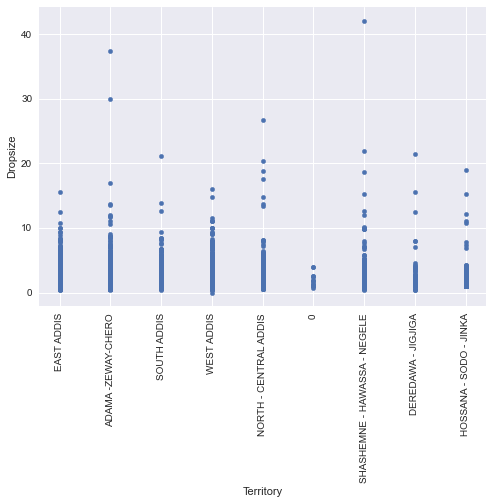

In [122]:
df2.plot.scatter(x = 'Territory', y = 'Dropsize')
plt.xticks(rotation=90)

# creating a table 

In [45]:
df4 = pd.DataFrame([[np.nan,18,3,4],[1,6,1,3],[15,60,0,1],[3,15,0.5,2],[12,0,0,2]],
                   index=pd.Index(['Fast Moving', 'Stars','Stockist','Surviving','Strugling to survive'],name='Cluster:'),
                  columns=pd.MultiIndex.from_product([['Drop Size','Delivery per Week'],['Min', 'Max']]))
df4.style

In [46]:
df4['Total'] = [345,67,3,368,6304]
df4

Drop Size     Delivery per Week     Total
                           Min Max               Min Max      
Cluster:                                                      
Fast Moving                NaN  18               3.0   4   345
Stars                      1.0   6               1.0   3    67
Stockist                  15.0  60               0.0   1     3
Surviving                  3.0  15               0.5   2   368
Strugling to survive      12.0   0               0.0   2  6304

In [47]:
df4['Sample size'] = [20,5,1,24,50]
df4['%out of total'] = ['5%','1%','0%','5%','89%']
df4['EAST ADDIS'] = [20,14,0,83,1174]
df4['SOUTH ADDIS'] = [25,10,0,49,1144]   
df4['WEST ADDIS'] = [43,15,1,79,1447]  
df4['NORTH - CENTRAL ADDIS'] = [44,7,0,38,855]    
df4['ADAMA -ZEWAY-CHERO'] = [46,13,2,90,1187]
df4['DEREDAWA - JIGJIGA'] = [5,4,0,5,24]
df4['HOSSANA - SODO - JINKA'] = [20,14,0,83,1174]
df4['SHASHEMNE - HAWASSA - NEGELE'] = [131,2,0,22,368]
 
df4


Drop Size     Delivery per Week     Total Sample size  \
                           Min Max               Min Max                     
Cluster:                                                                     
Fast Moving                NaN  18               3.0   4   345          20   
Stars                      1.0   6               1.0   3    67           5   
Stockist                  15.0  60               0.0   1     3           1   
Surviving                  3.0  15               0.5   2   368          24   
Strugling to survive      12.0   0               0.0   2  6304          50   

                     %out of total EAST ADDIS SOUTH ADDIS WEST ADDIS  \
                                                                       
Cluster:                                                               
Fast Moving                     5%         20          25         43   
Stars                           1%         14          10         15   
Stockist                        0%          0           0          1   
Surviving                       5%         83          49         79   
Strugling to survive           89%       1174        1144       1447   

                     NORTH - CENTRAL ADDIS ADAMA -ZEWAY-CHERO  \
                                                                
Cluster:                                                        
Fast Moving                             44                 46   
Stars                                    7                 13   
Stockist                                 0                  2   
Surviving                               38                 90   
Strugling to survive                   855               1187   

                     DEREDAWA - JIGJIGA HOSSANA - SODO - JINKA  \
                                                                 
Cluster:                                                         
Fast Moving                           5                     20   
Stars                                 4                     14   
Stockist                              0                      0   
Surviving                             5                     83   
Strugling to survive                 24                   1174   

                     SHASHEMNE - HAWASSA - NEGELE  
                                                   
Cluster:                                           
Fast Moving                                   131  
Stars                                           2  
Stockist                                        0  
Surviving                                      22  
Strugling to survive                          368

(0.0, 4.0)

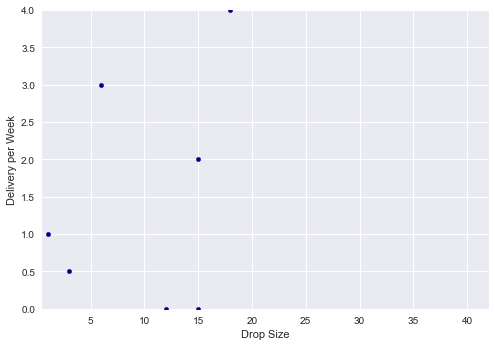

In [97]:
df4.plot.scatter(x = 'Drop Size', y = 'Delivery per Week',c = 'darkblue')
plt.xlim(0.5, 42)
plt.ylim(0, 4)
#plt.axis('tight')


(-3.0, 63.0, -0.2, 4.2)

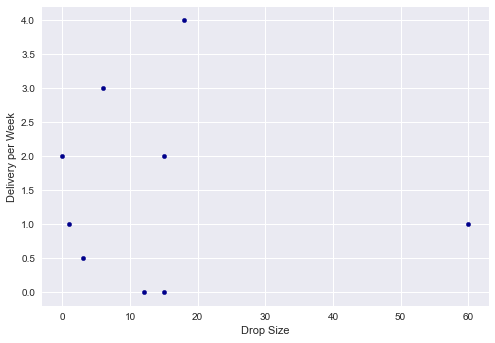

In [98]:
df4.plot.scatter(x = 'Drop Size', y = 'Delivery per Week',c = 'darkblue')
#plt.xlim(0.5, 42)
#plt.ylim(0, 4)
plt.axis('tight')

(0.0, 4.0)

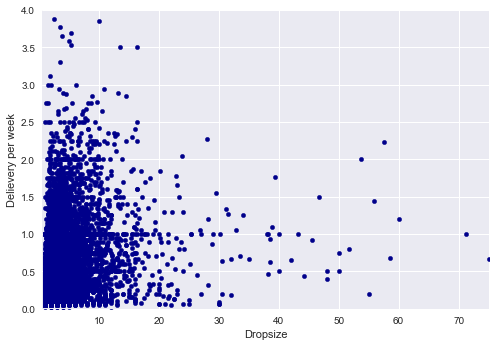

In [184]:
df2.plot.scatter(x = 'Dropsize', y = 'Delievery per week',c = 'darkblue')
plt.xlim(0.5, 75)
plt.ylim(0, 4)


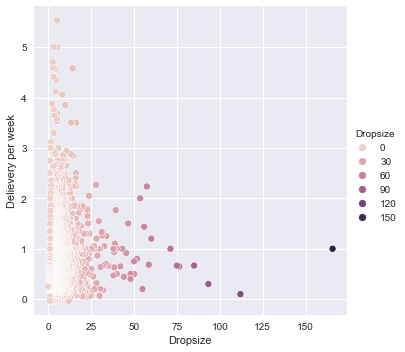

In [5]:
sns.relplot(x="Dropsize", y="Delievery per week", hue="Dropsize", data=df2)

In [83]:

def group(Dropsize, Delievery_per_week):
    if Dropsize <= 6 and (Delievery_per_week > 3 and Delievery_per_week < 4):
        return "clustr1"
    elif Dropsize > 6 and (Delievery_per_week >=1 and Delievery_per_week < 3):
        return "clustr2"
    elif (Dropsize > 15 and Dropsize < 60) and Delievery_per_week < 1:
        return  "clustr3"
    elif (Dropsize > 3 and Dropsize < 15) and (Delievery_per_week > 0.5 and Delievery_per_week< 2):
        return "clustr4"
    elif Dropsize < 12 and (Delievery_per_week > 0 and Delievery_per_week < 2):
        return "clustr5"

#clustr_1 = df2[(df2['Dropsize'] <= 18) & (df2['Delievery per week'] > 3) & (df2['Delievery per week'] < 4)]
#clustr_2 = df2[(df2['Dropsize'] > 6)  & (df2['Delievery per week'] >= 1) & (df2['Delievery per week'] < 3)]
#clustr_3 = df2[(df2['Dropsize'] > 15) & (df2['Dropsize'] < 60) & (df2['Delievery per week'] < 1)]
#clustr_4 = df2[(df2['Dropsize'] > 3) & (df2['Dropsize'] < 15) & (df2['Delievery per week'] > 0.5) & (df2['Delievery per week']
#clustr_5 = df2[(df2['Dropsize'] < 12)   & (df2['Delievery per week'] > 0) & (df2['Delievery per week'] < 2)]

In [84]:
# creating new column to satsfiye the above condition
df2[['clustr']] = df2[['Dropsize','Delievery_per_week']].apply(group(Dropsize, Delievery_per_week))

NameError: name 'Dropsize' is not defined

In [85]:
df2.head()

,Outlet ID,Territory,Area,Outlet,Total_delivery,Quantity_sold,First purchase week,Week of analysis,Number of weeks b/n purchase and analysis data,Delievery_per_week,Dropsize,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,clustrs
0,61fbcd832cea787beffc31c8,SHASHEMNE - HAWASSA - NEGELE,SEFERESELAM - YERGALEM,wendimamachoch stockist,16,2650,5,21,16,1.000000,165.625000,NaN,NaN,NaN,NaN,NaN,clustr1
1,623588d82cea787bef0153a6,ADAMA -ZEWAY-CHERO,ZEWAY - MEKI - BUTAGIRA,Shimekit sttockist,1,112,11,21,10,0.100000,112.000000,NaN,NaN,NaN,NaN,NaN,clustr1
2,6159f38bbab1dd88bd6a348d,NORTH - CENTRAL ADDIS,WELOSEFER - OLOMPIA,German Restaurant &bar,6,560,1,21,20,0.300000,93.333333,NaN,NaN,NaN,NaN,NaN,clustr1
3,625cf6592cea787bef04db59,HOSSANA - SODO - JINKA,SODO - AREKA - SHONE,semegn stock,2,170,18,21,3,0.666667,85.000000,NaN,NaN,NaN,NaN,NaN,clustr1
4,61b20923554c5775fdf44788,SOUTH ADDIS,JEMO - HANAMARIAM,Sefi stockist,13,993,1,21,20,0.650000,76.384615,NaN,NaN,NaN,NaN,NaN,clustr1


(0.0, 4.0)

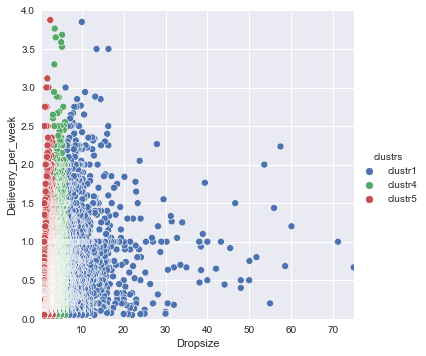

In [28]:
sns.relplot(x="Dropsize", y="Delievery_per_week", hue="clustrs", data=df2)
plt.xlim(0.5, 75)
plt.ylim(0, 4)

In [82]:
# create a list of our conditions
conditions = [
    (df2[(df2['Dropsize'] <= 6) & (df2['Delievery_per_week'] > 3) & (df2['Delievery_per_week'] < 4)]),
    (df2[(df2['Dropsize'] > 6) & (df2['Delievery_per_week'] >=1) & (df2['Delievery_per_week'] < 3)]),
    (df2[(df2['Dropsize'] > 15) & (df2['Dropsize'] < 60) & (df2['Delievery_per_week'] < 1)]),
    (df2[(df2['Dropsize'] > 3) & (df2['Dropsize'] < 15) & (df2['Delievery_per_week'] > 0.5) and (df2['Delievery_per_week'] < 2)]),
    (df2[(df2['Dropsize'] < 12) & (df2['Delievery_per_week'] > 0) & (df2['Delievery_per_week'] < 2)])
    ]
#data_query = data[(data['year'] >= 2005) & (data['year'] <= 2010)]
values = ['cluster1', 'cluster2', 'cluster3', 'cluster4','cluster5']
df2['clustr2'] = np.select(conditions, values)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df = df[(df['col'] < -0.25) | (df['col'] > 0.25)]